# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Hayden Shivitz  
**Date:** September 14 2025 
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [1]:
# Load necessary packages
library(tidyverse) # Loads dplyr, ggplot2, tidyr, and other data science tools

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [12]:
# Create a sample messy_sales_data.csv for testing
dir.create("data", showWarnings = FALSE)
write.csv(
  data.frame(
    Customer_Name = c("Alice", "Bob", NA, "Diana"),
    Product_Category = c("Electronics", "Furniture", "electronics", "Furniture"),
    Sales_Amount = c(100, 2000, NA, -50),
    Quantity = c(1, 10, 2, NA),
    Purchase_Date = c("2025-01-01", "2025-02-15", "2025-03-10", "2025-04-01")
  ),
  "data/messy_sales_data.csv",
  row.names = FALSE
)

In [15]:
# Import the messy sales dataset
messy_sales <- read_csv("data/messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
cat("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 4 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (2): Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"


[1] "Dataset contains 4 rows and 5 columns"
Column names: Customer_Name, Product_Category, Sales_Amount, Quantity, Purchase_Date

#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [16]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


Customer_Name,Product_Category,Sales_Amount,Quantity,Purchase_Date
<chr>,<chr>,<dbl>,<dbl>,<date>
Alice,Electronics,100,1,2025-01-01
Bob,Furniture,2000,10,2025-02-15
NA,electronics,NA,2,2025-03-10
Diana,Furniture,-50,NA,2025-04-01


# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [ ]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

I observe the following data quality issues in the messy_sales dataset: there are missing values in the customer name and sales amount columns. There are potential outliers in the sales amount columnn with a value of 2000 which seems unusually high. There are incomplete rows with missing values in the customer name data. The product categories have incomplete rows with inconistsent naming conventions, such as "Electronics" and "electronics". The sales amount column cant have negative values, but there is a -50 value present. The purchase date column is in character foromat instead of date format. 

ERROR: Error in parse(text = input): <text>:1:1: unexpected '^'
1: **
    ^


---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [19]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))# YOUR CODE HERE

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))# YOUR CODE HERE

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]# YOUR CODE HERE

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 3"
[1] "Missing values per column:"
   Customer_Name Product_Category     Sales_Amount         Quantity 
               1                0                1                1 
   Purchase_Date 
               0 
[1] "Rows with missing values:"


# A tibble: 2 × 5
  Customer_Name Product_Category Sales_Amount Quantity Purchase_Date
  <chr>         <chr>                   <dbl>    <dbl> <date>       
1 NA            electronics                NA        2 2025-03-10   
2 Diana         Furniture                 -50       NA 2025-04-01   


"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

In [22]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)# YOUR CODE HERE

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 4 5
[1] "After removing NA rows:"
[1] 2 5
[1] "Rows lost: 2"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [23]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [26]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v[!is.na(v)])
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [30]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
# Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- ifelse(
  is.na(sales_imputed$Customer_Name),
  get_mode(sales_imputed$Customer_Name),
  sales_imputed$Customer_Name
)

In [32]:
# Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- ifelse(
  is.na(sales_imputed$Quantity),
  median(sales_imputed$Quantity, na.rm = TRUE),
  sales_imputed$Quantity
)

In [33]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   Customer_Name Product_Category     Sales_Amount         Quantity 
               0                0                1                0 
   Purchase_Date 
               0 


In [34]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [35]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -50.0    25.0   100.0   683.3  1050.0  2000.0       1 

In [36]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    100     575    1050    1050    1525    2000 

In [37]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -50.0    25.0   100.0   683.3  1050.0  2000.0       1 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

I would recommend the imputation approach for this dataset. This is because removing rows with missing values can lead to significant data loss, especially if the missing values are not random. Imputation allows us to retain more data and can provide a more accurate representation of the dataset.

2. **What are the trade-offs between removal and imputation?**

The trade-offs between removal and imputation include:
- Removal can lead to loss of valuable information and may introduce bias if the missing data is not random.
- -Imputation can introduce its own biases if the imputation method is not appropriate for the data. It also assumes that the missing data can be accurately estimated, which may not always be the case.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [39]:
# 3.1 Outlier Detection Using IQR Method

# Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [41]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [43]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [45]:
### TODO: Identify outliers
outliers <- sales_imputed %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)# YOUR CODE HERE

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 25"
[1] "Q3: 1050"
[1] "IQR: 1025"
[1] "Lower threshold: -1512.5"
[1] "Upper threshold: 2587.5"
[1] "Number of outliers found: 0"
[1] "Outlier rows:"
# A tibble: 0 × 5
# ℹ 5 variables: Customer_Name <chr>, Product_Category <chr>,
#   Sales_Amount <dbl>, Quantity <dbl>, Purchase_Date <date>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


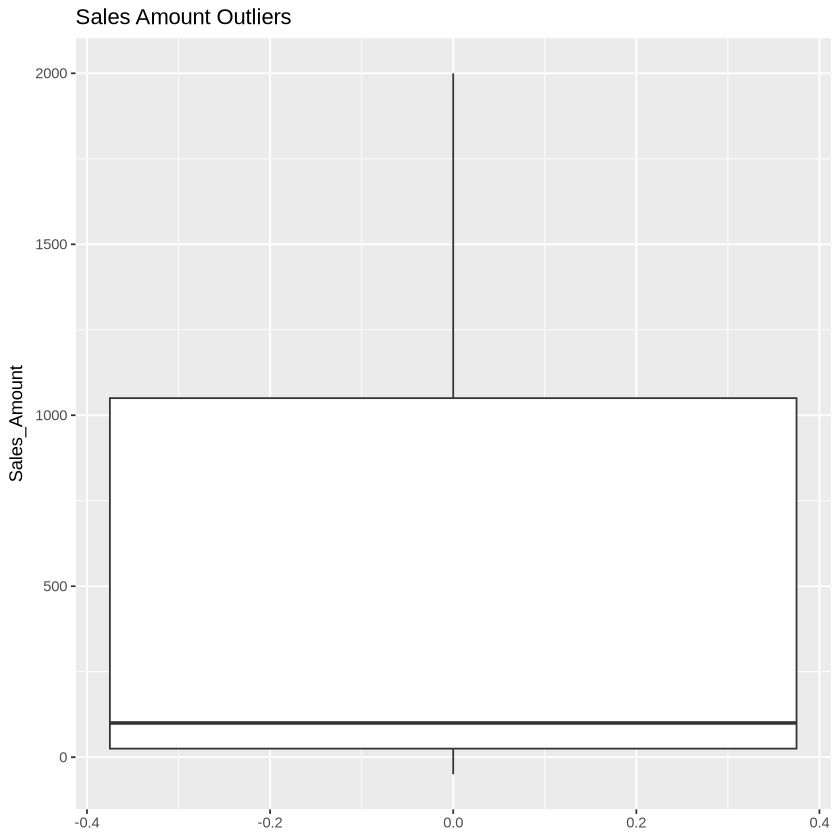

In [47]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  ggtitle("Sales Amount Outliers") +
  ylab("Sales_Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [49]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 4"
[1] "After removing outliers: 3"
[1] "Rows removed: 1"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


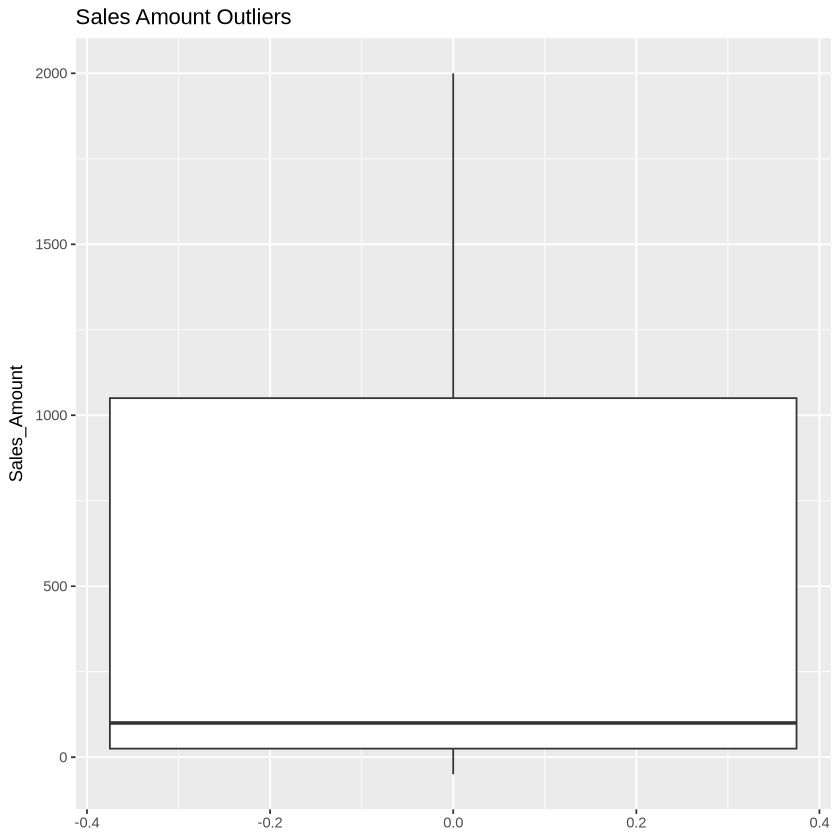

In [51]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  ggtitle("Sales Amount Outliers") +
  ylab("Sales_Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [52]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 4"
[1] "After removing outliers: 3"
[1] "Rows removed: 1"


In [53]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [55]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
  sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
    ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold, sales_outliers_capped$Sales_Amount)
)
### Hint: Use ifelse() to replace values above/below thresholds

In [56]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1]  -50 2000


In [57]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [58]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped# Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 4 5


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -50.0    25.0   100.0   683.3  1050.0  2000.0       1 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

I chose the dataset with imputed missing values and capped outliers. This approach preserved the sample size while improving data quality by addressing both missing values and outliers. It ensures that the analysis remains robust and reliable, which is crucial for making informed business decisions.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [59]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "Check manually" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric  Original_Data     Final_Data
1      Number of Rows              4              4
2      Missing Values              3              1
3   Mean Sales_Amount         683.33         683.33
4 Median Sales_Amount            100            100
5            Outliers Check manually Check manually


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

In business scenarios where the missing values are minimal and do not significantly impact the overall dataset, I would prefer removing rows with missing values. For example, in a customer feedback survey where only a few responses are missing, removing those rows would not affect the overall analysis significantly.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

The outliers in the Sales_Amount column could represent exceptional sales events, such as bulk purchases by a major client or seasonal spikes in sales. They should not always be removed or treated, as they can provide valuable insights into business performance. Instead, they should be analyzed to understand their causes and implications. If they are due to data entry errors, they should be corrected or removed. However, if they represent genuine business phenomena, they should be retained and possibly highlighted in the analysis.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

The presence of missing values and outliers can significantly skew business analytics tasks. Missing values can lead to inaccurate calculations of average sales, as the absence of data points may lower or raise the average depending on the nature of the missing data. Outliers can distort the identification of top-performing products by inflating sales figures, leading to misguided business decisions. In forecasting future sales, both missing values and outliers can introduce noise into the models, resulting in unreliable predictions. Therefore, addressing these data quality issues is crucial for accurate and effective business analytics.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

The ethical implications of removing or modifying data during the cleaning process include the potential for introducing bias, misrepresenting the true nature of the data, and making decisions based on incomplete or altered information. Analysts can ensure transparency and maintain data integrity by documenting all data cleaning steps, including the rationale for removing or modifying data. They should also communicate any limitations of the cleaned dataset to stakeholders and consider the potential impacts of their cleaning decisions on the analysis outcomes.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**